# What measure leaves powerlaws invariant?
Tim Tyree<br>
9.18.2021

Frantically looking for something conserved between all fits...

__Results__
- an apparent attraction magnitude exists for the FK model but not the LR model
- a smaller r does better than larger r for the FK model
- TODO: test whether for the FK and/or LR model, a particular value for $\mu$ exists for $K(\mu)=a\kappa^\mu r^\mu$ xor $K(\mu)=a\kappa^\mu r^{2\mu}$.


In [643]:
# %matplotlib notebook
from lib.my_initialization import *
import random,scipy
from scipy import stats

import random,scipy
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import CloughTocher2DInterpolator
import matplotlib as mpl #for colorbar
from scipy import stats
#DONE: hook this routine up to dask
#DONT: hook this routine up to dask_cuda

from lib.viewer.gener_q_vs_w_for_df import *

from lib.my_initialization import *
from lib import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [644]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

In [90]:
input_fn_star=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_ar_star.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/black_star_run_1_all_powerlaw_fits.csv"

df=pd.read_csv(input_fn_star)
#map columns of star df to df
df['varkappa']=df['astar']
df['r']=df['rstar']
df['model_name_full']=df['model_name']
df_star=df.copy()

input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_18_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_15_all_powerlaw_fits.csv"
df=pd.read_csv(input_fn)

In [91]:
rtol=0.001#0.001
bookeep=False
#TODO: look up the comparable result from df if they are contained in df_star
for n,row in df_star.iterrows():
#     print(row)
    boo =np.isclose(df['r'],row['r'],rtol=rtol)
    boo&=np.isclose(df['D'],row.D,rtol=rtol)
    boo&=np.isclose(df['kappa'],row.kappa,rtol=rtol)
    boo&=np.isclose(df['varkappa'],row.varkappa,rtol=rtol)
    assert ( boo.any() )  #guarantee that the original item was evaluated at least once
#     assert ( sum(boo)==1 )  #guarantee that the original item was evaluated only once
# ^this failed for all rstar attempted.  additional frames will exist in this arstar selection process
    bookeep|=boo

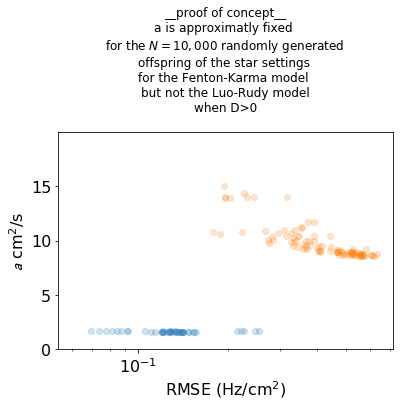

In [650]:
#plot a
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
#restrict to only the star events
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0#==0#
boolr&=df['D']>0#==0#
#remove any reflecting boundary condition trials
boofk&=df['reflect']==1
boolr&=df['reflect']==1


#plot a
fig,ax=plt.subplots()
x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'varkappa'].values
ax.scatter(x_values,y_values,c='C0',alpha=0.2)
x_values=df.loc[boolr,'rmse_full'].values
y_values=df.loc[boolr,'varkappa'].values
ax.scatter(x_values,y_values,c='C1',alpha=0.2)
FormatAxes(
    ax,
    x1label=r'RMSE (Hz/cm$^2$)',
    x2label=r'$\mathcal{a}$ cm$^2$/s',
    x2lim=[0,np.max(y_values)+5]
)
ax.set_xscale('log')
ax.set_title(r'''__proof of concept__
a is approximatly fixed 
for the $N=10,000$ randomly generated 
offspring of the star settings 
for the Fenton-Karma model 
but not the Luo-Rudy model
when D>0
''')
plt.show()

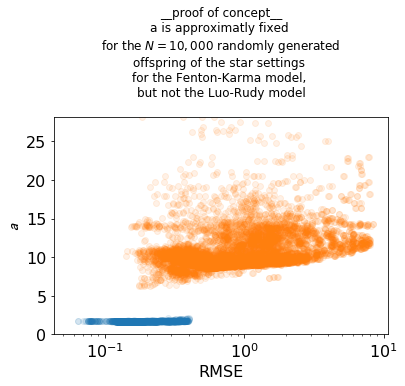

In [642]:
#plot a
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
#restrict to only the star events
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0#==0#
boolr&=df['D']>0#==0#

#plot a
fig,ax=plt.subplots()
x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'varkappa'].values
ax.scatter(x_values,y_values,c='C0',alpha=0.1)
x_values=df.loc[boolr,'rmse_full'].values
y_values=df.loc[boolr,'varkappa'].values
ax.scatter(x_values,y_values,c='C1',alpha=0.1)
FormatAxes(
    ax,
    x1label='RMSE',
    x2label=r'$\mathcal{a}$',
    x2lim=[0,np.max(y_values)]
)
ax.set_xscale('log')
ax.set_title(r'''__proof of concept__
a is approximatly fixed 
for the $N=10,000$ randomly generated 
offspring of the star settings 
for the Fenton-Karma model, 
but not the Luo-Rudy model
''')
plt.show()

for particles that pair-annihilate according to $w=Mq^\nu$,

In [111]:
df['l']=df['varkappa']/(df['kappa']*df['r'])     #cm
df['lt']=df['varkappa']/(df['kappa']*df['r'])**2 #seconds

mup=.5
df['K']=df['varkappa']*(df['kappa']*df['r'])**mup
df['J']=df['varkappa']*np.sqrt(df['kappa']*df['r'])


In [112]:
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
#restrict to only the star events
boofk&=bookeep
boolr&=bookeep

In [592]:
columns=['rmse_full','varkappa','r','kappa', 'K','l','lt']
# data = np.cumsum(np.random.rand(10,3),axis=1)
# df = pd.DataFrame(data,columns=columns)

def g(x,y):
#     plt.scatter(df[x], df[y])
    ax=plt.gca()
    x_values=df.loc[boofk,x].values
    y_values=df.loc[boofk,y].values
    mx=np.max(y_values)
    ax.scatter(x_values,y_values,c='C0',alpha=0.1)
    x_values=df.loc[boolr,x].values
    y_values=df.loc[boolr,y].values
    mx=np.max((np.max(y_values),mx))
    ax.scatter(x_values,y_values,c='C1',alpha=0.1)
    FormatAxes(
        ax,
        x1label=x,#'RMSE',
        x2label=y,#r'$\mathcal{a}$',
        x2lim=[0,mx]
    )
    plt.show()

interactive_plot = interactive(g, x=columns, y=columns)
interactive_plot

interactive(children=(Dropdown(description='x', options=('rmse_full', 'varkappa', 'r', 'kappa', 'K', 'l', 'lt'…

In [315]:
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
#restrict to only the star events
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0#==0#
boolr&=df['D']>0#==0#


#define interactive widgets
pum_slider=widgets.FloatSlider(value=1.,min=0,max=1,step=0.5,description='pum')
mup_slider=widgets.FloatSlider(value=0.5,min=-6,max=6,step=0.1,description='mup')
columns=['rmse_full','varkappa','r','kappa','l','lt']

def foo(x,mup,pum):
    df['K']=df['varkappa']*(df['kappa']**pum*df['r'])**mup
    ax=plt.gca()
    x_values=df.loc[boofk,x].values
    y_values=df.loc[boofk,'K'].values
    mx=np.max(y_values)
    ax.scatter(x_values,y_values,c='C0',alpha=0.1)
    x_values=df.loc[boolr,x].values
    y_values=df.loc[boolr,'K'].values
    mx=np.max((np.max(y_values),mx))
    ax.scatter(x_values,y_values,c='C1',alpha=0.1)
    FormatAxes(
        ax,
        x1label=x,#'RMSE',
        x2label='K',#r'$\mathcal{a}$',
        x2lim=[0,mx]
    )
    ax.set_title(r'$K = a\;\kappa$ ^'+f'{pum*mup} r ^ {mup}')
    #     ax.set_title(r'$K = a\;\kappa$ ^'+f'{pum*mup} r ^ {mup}  D ^ {mud}')
    plt.show()

interactive_plot = interactive(foo, x=columns, mup=mup_slider,pum=pum_slider)
print('K = a (kappa^pum r)^mup')
interactive_plot

K = a (kappa^pum r)^mup


interactive(children=(Dropdown(description='x', options=('rmse_full', 'varkappa', 'r', 'kappa', 'l', 'lt'), va…

In [302]:
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0#==0#
boolr&=df['D']>0#==0#

#define interactive widgets
pum_slider=widgets.FloatSlider(value=0.5,min=0,max=1,step=0.5,description='pum')
mup_slider=widgets.FloatSlider(value=0.5,min=-6,max=6,step=0.1,description='mup')
columns=['varkappa','rmse_full','r','kappa','D','l','lt']

def foo(x,c,mup,pum):
    df['K']=df['varkappa']**1*(df['kappa']**pum*df['r'])**mup
    ax=plt.gca()
    x_values=df.loc[boofk,x].values
    y_values=df.loc[boofk,'K'].values
    c_values=-df.loc[boofk,c].values
    mx=np.max(y_values)
    ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=0.2)
    x_values=df.loc[boolr,x].values
    y_values=df.loc[boolr,'K'].values
    c_values=-df.loc[boolr,c].values
    mx=np.max((np.max(y_values),mx))
    ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=0.2)
    FormatAxes(
        ax,
        x1label=x,#'RMSE',
        x2label='K',#r'$\mathcal{a}$',
#         x2lim=[0.1,mx+100],use_loglog=True
    )
    ax.set_title(r'$K = \kappa$ ^'+f'{pum*mup} r ^ {mup}')
#     ax.set_title(r'$K = a \kappa$ ^'+f'{pum*mup} r ^ {mup}')
    plt.show()

interactive_plot = interactive(foo, x=columns, c=columns, mup=mup_slider,pum=pum_slider)
# print('K = a (kappa^pum r)^mup')
interactive_plot

interactive(children=(Dropdown(description='x', options=('varkappa', 'rmse_full', 'r', 'kappa', 'D', 'l', 'lt'…

In [293]:
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0
boolr&=df['D']>0

#define interactive widgets
pum_slider=widgets.FloatSlider(value=1,min=0,max=1,step=0.01,description='pum')
mup_slider=widgets.FloatSlider(value=0.5,min=-6,max=6,step=0.1,description='mup')
mud_slider=widgets.FloatSlider(value=0,min=-6,max=6,step=0.1,description='mud')
columns=['rmse_full','varkappa','r','kappa','D','l','lt']

def foo(x,c,mup,pum,mud):
    alpha=0.2#0.01#
    df['K']=df['varkappa']*(df['kappa']**pum*df['r'])**mup * df['D']**mud
    ax=plt.gca()
    x_values=df.loc[boofk,x].values
    y_values=df.loc[boofk,'K'].values
    c_values=-df.loc[boofk,c].values
    mx=np.max(y_values)
    ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=alpha)
    x_values=df.loc[boolr,x].values
    y_values=df.loc[boolr,'K'].values
    c_values=-df.loc[boolr,c].values
    mx=np.max((np.max(y_values),mx))
    ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=alpha)
    FormatAxes(
        ax,
        x1label=x,#'RMSE',
        x2label='K',#r'$\mathcal{a}$',
#         x2lim=[0.1,mx+100],use_loglog=True
    )
    ax.set_title(r'$K = a\;\kappa$ ^'+f'{pum*mup} r ^ {mup}  D ^ {mud}')
    plt.show()

interactive_plot = interactive(foo, x=columns, c=columns, mup=mup_slider,pum=pum_slider,mud=mud_slider)
# print('K = a (kappa^pum r)^mup')
interactive_plot

interactive(children=(Dropdown(description='x', options=('rmse_full', 'varkappa', 'r', 'kappa', 'D', 'l', 'lt'…

In [304]:
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0#==0#
boolr&=df['D']>0#==0#

#define interactive widgets
pum_slider=widgets.FloatSlider(value=0.66,min=0,max=1,step=0.01,description='pum')
mup_slider=widgets.FloatSlider(value=1.,min=-6,max=6,step=0.1,description='mup')
mud_slider=widgets.FloatSlider(value=0,min=-6,max=6,step=0.1,description='mud')
columns=['rmse_full','varkappa','r','kappa','D','l','lt']

def foo(x,c,mup,pum,mud):
    alpha=0.2#0.01#
    df['K']=df['varkappa']*(df['kappa']**pum*df['r'])**mup * df['D']**mud
    ax=plt.gca()
    x_values=df.loc[boofk,x].values
    y_values=df.loc[boofk,'K'].values
    c_values=-df.loc[boofk,c].values
    mx=np.max(y_values)
    ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=alpha)
    x_values=df.loc[boolr,x].values
    y_values=df.loc[boolr,'K'].values
    c_values=-df.loc[boolr,c].values
    mx=np.max((np.max(y_values),mx))
    ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=alpha)
    FormatAxes(
        ax,
        x1label=x,#'RMSE',
        x2label='K',#r'$\mathcal{a}$',
#         x2lim=[0.1,mx+100],use_loglog=True
    )
    ax.set_title(r'$K = a\;\kappa$ ^'+f'{pum*mup} r ^ {mup}  D ^ {mud}')
    plt.show()

interactive_plot = interactive(foo, x=columns, c=columns, mup=mup_slider,pum=pum_slider,mud=mud_slider)
# print('K = a (kappa^pum r)^mup')
interactive_plot

interactive(children=(Dropdown(description='x', options=('rmse_full', 'varkappa', 'r', 'kappa', 'D', 'l', 'lt'…

__Observations__
for both the LR model and the FK model,
- longer ranges andlower rates tend to have the best RMSE's 
- basically all of the nonmanifold points for the LR model have $D=0$

In [582]:
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# # restrict to only the star settings
# boofk&=bookeep
# boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0#==0#
boolr&=df['D']>0#==0#

#define interactive widgets
pum_slider=widgets.FloatSlider(value=1,min=0,max=1,step=0.01,description='pum')
mup_slider=widgets.FloatSlider(value=.5,min=-6,max=6,step=0.1,description='mup')
mud_slider=widgets.FloatSlider(value=0,min=-6,max=6,step=0.1,description='mud')
mua_slider=widgets.FloatSlider(value=1,min=-6,max=6,step=0.1,description='mua')
columns=['rmse_full','varkappa','r','kappa','D','l','lt']

def foo(x,c,mup,pum,mud,mua):
    alpha=0.2#0.01#
    df['K']=df['varkappa']**mua*(df['kappa']**pum*df['r'])**mup * df['D']**mud
    ax=plt.gca()
    x_values=df.loc[boofk,x].values
    y_values=df.loc[boofk,'K'].values
    c_values=-df.loc[boofk,c].values
    mx=np.max(y_values)
#     ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=alpha)
    ax.scatter(x_values,y_values,c='C0',alpha=alpha)
    x_values=df.loc[boolr,x].values
    y_values=df.loc[boolr,'K'].values
    c_values=-df.loc[boolr,c].values
    mx=np.max((np.max(y_values),mx))
#     ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=alpha)
    ax.scatter(x_values,y_values,c='C1',alpha=alpha)
    FormatAxes(
        ax,
        x1label=r'RMSE (Hz/cm$^2$)',#x,#
        x2label='J',#r'$\mathcal{a}$',
        x2lim=[1,mx+100],use_loglog=True
    )
#     ax.set_title(f'star settings\nJ = a^{mua} kappa ^'+f'{pum*mup:.1f} r ^ {mup}  D ^ {mud}\n')
    ax.set_title(f'offspring of star settings\nJ = a^{mua} kappa ^'+f'{pum*mup:.1f} r ^ {mup}  D ^ {mud}\n')
    plt.show()

interactive_plot = interactive(foo, x=columns, c=columns, mup=mup_slider,pum=pum_slider,mud=mud_slider,mua=mua_slider)
# print('K = a (kappa^pum r)^mup')
interactive_plot

interactive(children=(Dropdown(description='x', options=('rmse_full', 'varkappa', 'r', 'kappa', 'D', 'l', 'lt'…

1.0373268261264346

In [542]:
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0#==0#
boolr&=df['D']>0#==0#

#define interactive widgets
pum_slider=widgets.FloatSlider(value=0.66,min=0,max=1,step=0.01,description='pum')
mup_slider=widgets.FloatSlider(value=1.,min=-6,max=6,step=0.1,description='mup')
mud_slider=widgets.FloatSlider(value=0,min=-6,max=6,step=0.1,description='mud')
mua_slider=widgets.FloatSlider(value=1,min=-6,max=6,step=0.1,description='mua')
columns=['rmse_full','varkappa','r','kappa','D','l','lt']

def foo(x,c,mup,pum,mud,mua):
    alpha=0.2#0.01#
    df['K']=df['varkappa']*mua*(df['kappa']**pum*df['r'])**mup * df['D']**mud
    ax=plt.gca()
    x_values=df.loc[boofk,x].values
    y_values=df.loc[boofk,'K'].values
    c_values=-df.loc[boofk,c].values
    mx=np.max(y_values)
    ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=alpha)
    x_values=df.loc[boolr,x].values
    y_values=df.loc[boolr,'K'].values
    c_values=-df.loc[boolr,c].values
    mx=np.max((np.max(y_values),mx))
    ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=alpha)
    FormatAxes(
        ax,
        x1label=x,#'RMSE',
        x2label='K',#r'$\mathcal{a}$',
#         x2lim=[0.1,mx+100],use_loglog=True
    )
    ax.set_title(r'$K = a\;\kappa$ ^'+f'{pum*mup} r ^ {mup}  D ^ {mud}')
    plt.show()

interactive_plot = interactive(foo, x=columns, c=columns, mup=mup_slider,pum=pum_slider,mud=mud_slider,mua=mua_slider)
# print('K = a (kappa^pum r)^mup')
interactive_plot

interactive(children=(Dropdown(description='x', options=('rmse_full', 'varkappa', 'r', 'kappa', 'D', 'l', 'lt'…

#  attempting to deduce relative exponents between parameters

In [221]:
#TODO: plot r versus kappa
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0
boolr&=df['D']>0

#define interactive widgets
pum_slider=widgets.FloatSlider(value=1,min=-6,max=6,step=0.1,description='pum')
mup_slider=widgets.FloatSlider(value=1.,min=-6,max=6,step=0.1,description='mup')
mud_slider=widgets.FloatSlider(value=0,min=-6,max=6,step=0.1,description='mud')
columns=['kappa','rmse_full','varkappa','r','D','l','lt']

def foo(x,c,mup,pum,mud):
    alpha=0.2#0.01#
    df['K']=df['varkappa']**0*df['kappa']**pum*(df['r'])**mup * df['D']**mud
    ax=plt.gca()
    x_values=df.loc[boofk,x].values
    y_values=df.loc[boofk,'K'].values
    c_values=-df.loc[boofk,c].values
    mx=np.max(y_values)
    ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=alpha)
    dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)
    x_values=df.loc[boolr,x].values
    y_values=df.loc[boolr,'K'].values
    c_values=-df.loc[boolr,c].values
    mx=np.max((np.max(y_values),mx))
    ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=alpha)
    dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)

    FormatAxes(
        ax,
        x1label=x,#'RMSE',
        x2label='J',#r'$\mathcal{a}$',
#         x2lim=[0.1,mx+100],use_loglog=True
    )
    ax.set_title(r'$J = \kappa$ ^'+f'{pum} r ^ {mup}  D ^ {mud}')
    plt.show()

interactive_plot = interactive(foo, x=columns, c=columns, mup=mup_slider,pum=pum_slider,mud=mud_slider)
# print('K = a (kappa^pum r)^mup')
interactive_plot

interactive(children=(Dropdown(description='x', options=('kappa', 'rmse_full', 'varkappa', 'r', 'D', 'l', 'lt'…

In [633]:
df['J']=df['varkappa']*np.sqrt(df['kappa']*df['r'])
# df['J']=df['varkappa']*df['kap(pa']**2*df['r']**3


count    73.000000
mean      8.282267
std       0.633763
min       7.136900
25%       8.030440
50%       8.356057
75%       8.622542
max       9.391912
Name: J, dtype: float64

In [637]:
print(f"for the Fenton-Karma model, J is")
print(df.loc[boofk,'J'].describe())

print(f"\nfor the Luo-Rudy model, J is")
print(df.loc[boolr,'J'].describe())

for the Fenton-Karma model, J is
count    73.000000
mean      8.282267
std       0.633763
min       7.136900
25%       8.030440
50%       8.356057
75%       8.622542
max       9.391912
Name: J, dtype: float64

for the Luo-Rudy model, J is
count    187.000000
mean      70.155456
std        2.786130
min       66.843873
25%       68.292714
50%       69.135796
75%       70.745325
max       82.174769
Name: J, dtype: float64



loglog fit for Fenton-Karma model, N=73
m=-0.14241060343066894
Delta_m=0.006646205314555254
b=1.3249528403953517
Delta_b=0.03686209107937972
Rsquared=0.9613036801298578
linlin fit for Fenton-Karma model
m=-214.7793293190289
Delta_m=17.156836675306803
b=9.2826092558701
Delta_b=0.09298693551323911
Rsquared=0.8945079176153654

loglog fit for Luo-Rudy model, N=187
m=0.03353656227981421
Delta_m=0.007107449150725174
b=4.455273570592418
Delta_b=0.04375398278960868
Rsquared=0.31615878247486545
linlin fit for Luo-Rudy model
m=863.0689934563705
Delta_m=131.92812146955097
b=67.7661926798757
Delta_b=0.46719940004534555
Rsquared=0.4705361527253479


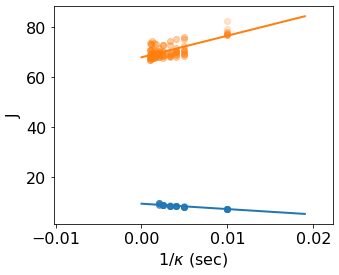

In [640]:
#plot powerlaw relations between r and kappa
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0#>0
boolr&=df['D']>0#>0


alpha=0.2#0.01#
murk=1
xv=np.arange(0,0.02,0.001)
fig,ax=plt.subplots(figsize=(5,4))
x_values=1/df.loc[boofk,'kappa'].values
# y_values=df.loc[boofk,'lt'].values**murk
y_values=df.loc[boofk,'J'].values**murk
c_values=-df.loc[boofk,'varkappa'].values
mx=np.max(y_values)
ax.scatter(x_values,y_values,c='C0',alpha=alpha)
# ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=alpha)
print(f'\nloglog fit for Fenton-Karma model, N={x_values.shape[0]}')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)
print('linlin fit for Fenton-Karma model')
dict_out=compute_95CI_ols(x_values,y_values);print_dict(dict_out)
yhat_values=dict_out['b']+dict_out['m']*xv
ax.plot(xv,yhat_values,lw=2,c='C0')


x_values=1/df.loc[boolr,'kappa'].values
# y_values=df.loc[boolr,'lt'].values**murk
y_values=df.loc[boolr,'J'].values**murk
c_values=-df.loc[boolr,'varkappa'].values
mx=np.max((np.max(y_values),mx))
ax.scatter(x_values,y_values,c='C1',alpha=alpha)
# ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=alpha)
print(f'\nloglog fit for Luo-Rudy model, N={x_values.shape[0]}')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)
print('linlin fit for Luo-Rudy model')
dict_out=compute_95CI_ols(x_values,y_values);print_dict(dict_out)
yhat_values=dict_out['b']+dict_out['m']*xv
ax.plot(xv,yhat_values,lw=2,c='C1')

FormatAxes(
    ax,
    x1label='$1/\kappa$ (sec)',#'RMSE',
    x2label='J',#r'a/$(r\kappa)^2$ (sec)',
#     x1lim=[0,0.015],
#     x2lim=[0,0.02],
#         x1lim=[0.001,0.015],x2lim=[0.001,0.02],use_loglog=True
)
# ax.set_title(r'$J = \kappa$ ^'+f'{pum} r ^ {mup}  D ^ {mud}')
plt.show()

#perform OLS on x,y
# yhat_values=dict_out['m']*x_values+dict_out['b']


In [ ]:
#plot powerlaw relations between r and kappa
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0#>0
boolr&=df['D']>0#>0


alpha=0.2#0.01#
murk=1
xv=np.arange(0,0.02,0.001)
fig,ax=plt.subplots(figsize=(5,4))
x_values=1/df.loc[boofk,'kappa'].values
y_values=df.loc[boofk,'l'].values**murk
c_values=-df.loc[boofk,'varkappa'].values
mx=np.max(y_values)
ax.scatter(x_values,y_values,c='C0',alpha=alpha)
# ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=alpha)
print(f'\nloglog fit for Fenton-Karma model, N={x_values.shape[0]}')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)
print('linlin fit for Fenton-Karma model')
dict_out=compute_95CI_ols(x_values,y_values);print_dict(dict_out)
yhat_values=dict_out['b']+dict_out['m']*xv
ax.plot(xv,yhat_values,lw=2,c='C0')


x_values=1/df.loc[boolr,'kappa'].values
y_values=df.loc[boolr,'l'].values**murk
c_values=-df.loc[boolr,'varkappa'].values
mx=np.max((np.max(y_values),mx))
ax.scatter(x_values,y_values,c='C1',alpha=alpha)
# ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=alpha)
print(f'\nloglog fit for Luo-Rudy model, N={x_values.shape[0]}')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)
print('linlin fit for Luo-Rudy model')
dict_out=compute_95CI_ols(x_values,y_values);print_dict(dict_out)
yhat_values=dict_out['b']+dict_out['m']*xv
ax.plot(xv,yhat_values,lw=2,c='C1')

FormatAxes(
    ax,
    x1label='$1/\kappa$ (sec)',#'RMSE',
    x2label=r'a/$(r\kappa)^2$ (sec)',
    x1lim=[0,0.015],
    x2lim=[0,.8],
#         x1lim=[0.001,0.015],x2lim=[0.001,0.02],use_loglog=True
)
# ax.set_title(r'$J = \kappa$ ^'+f'{pum} r ^ {mup}  D ^ {mud}')
plt.show()

#perform OLS on x,y
# yhat_values=dict_out['m']*x_values+dict_out['b']


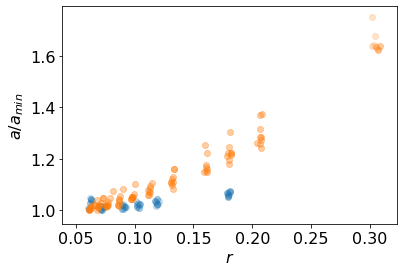

In [317]:
#TODO: plot powerlaw relations between r and kappa
alpha=0.2#0.01#

#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0
boolr&=df['D']>0

ax=plt.gca()
x_values=df.loc[boofk,'r'].values
y_values=df.loc[boofk,'varkappa'].values
y_values/=np.min(y_values)
mx=np.max(y_values)
ax.scatter(x_values,y_values,c='C0',alpha=alpha)
# print('loglog fit for Fenton-Karma model')
# dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)

x_values=df.loc[boolr,'r'].values
y_values=df.loc[boolr,'varkappa'].values
y_values/=np.min(y_values)
mx=np.max((np.max(y_values),mx))
ax.scatter(x_values,y_values,c='C1',alpha=alpha)
# print('\nloglog fit for Luo-Rudy model')
# dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)

FormatAxes(
    ax,
    x1label='$r$',#'RMSE',
    x2label=r'$a/a_{min}$',
#         x2lim=None,use_loglog=True
)
# ax.set_title(r'$J = \kappa$ ^'+f'{pum} r ^ {mup}  D ^ {mud}')
plt.show()

#perform OLS on x,y
# yhat_values=dict_out['m']*x_values+dict_out['b']


loglog fit for Fenton-Karma model
m=-0.028027649565432106
Delta_m=0.006025791593161395
b=0.6542055301996387
Delta_b=0.03342106781534777
Rsquared=0.539292407901278

loglog fit for Luo-Rudy model
m=-0.18339942007142926
Delta_m=0.009094101042314024
b=3.3883821582952818
Delta_b=0.05598395880915616
Rsquared=0.8941276080962045


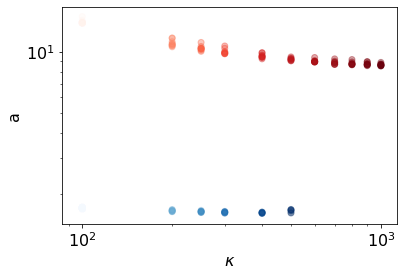

In [224]:
#TODO: plot powerlaw relations between kappa and a
alpha=0.2#0.01#
ax=plt.gca()
x_values=df.loc[boofk,'kappa'].values
y_values=df.loc[boofk,'varkappa'].values
c_values=-df.loc[boofk,'r'].values
mx=np.max(y_values)
ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=alpha)
print('loglog fit for Fenton-Karma model')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)

x_values=df.loc[boolr,'kappa'].values
y_values=df.loc[boolr,'varkappa'].values
c_values=-df.loc[boolr,'r'].values
mx=np.max((np.max(y_values),mx))
ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=alpha)
print('\nloglog fit for Luo-Rudy model')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)

FormatAxes(
    ax,
    x1label='$\kappa$',#'RMSE',
    x2label=f'a',
        x2lim=None,use_loglog=True
)
# ax.set_title(r'$J = \kappa$ ^'+f'{pum} r ^ {mup}  D ^ {mud}')
plt.show()

#perform OLS on x,y
# yhat_values=dict_out['m']*x_values+dict_out['b']


loglog fit for Fenton-Karma model
m=-0.27462731947583896
Delta_m=0.18255049179716307
b=0.879320016300138
Delta_b=0.2525320029757705
Rsquared=0.10909540395459584

loglog fit for Luo-Rudy model
m=0.697325129448702
Delta_m=0.3755648236469121
b=0.9211213204467739
Delta_b=0.7243109691793037
Rsquared=0.0668056696075115


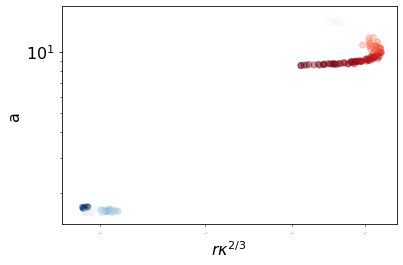

In [331]:
#TODO: plot powerlaw relations between D and a
alpha=0.2#0.01#
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0
boolr&=df['D']>0

df['rkp']=df['r']*df['kappa']**(2/3)

ax=plt.gca()
x_values=df.loc[boofk,'rkp'].values
y_values=df.loc[boofk,'varkappa'].values
c_values=df.loc[boofk,'r'].values
mx=np.max(y_values)
ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=alpha)
print('loglog fit for Fenton-Karma model')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)

x_values=df.loc[boolr,'rkp'].values
y_values=df.loc[boolr,'varkappa'].values
c_values=-df.loc[boolr,'r'].values
mx=np.max((np.max(y_values),mx))
ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=alpha)
print('\nloglog fit for Luo-Rudy model')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)

FormatAxes(
    ax,
    x1label='$r\kappa^{2/3}$',#'RMSE',
    x2label=f'a',
        x2lim=None,use_loglog=True
)
# ax.set_title(r'$J = \kappa$ ^'+f'{pum} r ^ {mup}  D ^ {mud}')
plt.show()

#perform OLS on x,y
# yhat_values=dict_out['m']*x_values+dict_out['b']



loglog fit for Fenton-Karma model
m=-0.08390235556103284
Delta_m=0.016900519655223416
b=0.7699217687377917
Delta_b=0.05456460680079355
Rsquared=0.5714642365786528


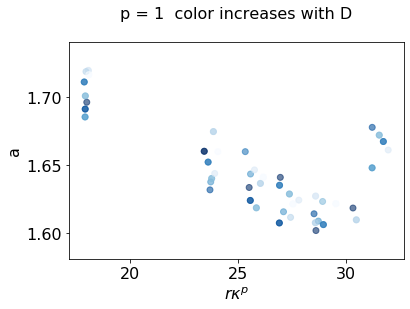

In [334]:
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0
boolr&=df['D']>0

#TODO: plot powerlaw relations between kappa^mup*r and a
alpha=0.6#0.01#
mup=1#0.5
ax=plt.gca()
x_values=df.loc[boofk,'r'].values*df.loc[boofk,'kappa'].values**mup
y_values=df.loc[boofk,'varkappa'].values
c_values=df.loc[boofk,'D'].values
mx=np.max(y_values)
ax.scatter(x_values,y_values,c=c_values,cmap='Blues',alpha=alpha)
print('loglog fit for Fenton-Karma model')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)

# x_values=df.loc[boolr,'r'].values*df.loc[boolr,'kappa'].values**mup
# y_values=df.loc[boolr,'varkappa'].values
# c_values=df.loc[boolr,'D'].values
# mx=np.max((np.max(y_values),mx))
# ax.scatter(x_values,y_values,c=c_values,cmap='Reds',alpha=alpha)
# print('\nloglog fit for Luo-Rudy model')
# dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)

FormatAxes(
    ax,
    x1label='$r\kappa^p$',#'RMSE',
    x2label=f'a',
#         x2lim=None,use_loglog=True
)
ax.set_title(f'p = {mup}  color increases with D\n',fontsize=16)
plt.show()

#perform OLS on x,y
# yhat_values=dict_out['m']*x_values+dict_out['b']


In [318]:
1/-0.08390235556103284
.05/1.7

0.029411764705882356

loglog fit for Fenton-Karma model
m=-0.5739482206880052
Delta_m=0.03244452386914028
b=0.061691673806620995
Delta_b=0.04505994198189612
Rsquared=0.9442347603615133
linlin fit for Fenton-Karma model
m=-0.07034283034504356
Delta_m=0.00563759750080828
b=0.7683137093206323
Delta_b=0.023039397831764213
Rsquared=0.8938851023217842

loglog fit for Luo-Rudy model
m=0.08707318293142673
Delta_m=0.05398828314749484
b=1.3703468026114338
Delta_b=0.12326133036111618
Rsquared=0.05124643309779358
linlin fit for Luo-Rudy model
m=0.07386356936871125
Delta_m=0.02959885915401879
b=4.085437731759714
Delta_b=0.30623031428914377
Rsquared=0.1145079682025274


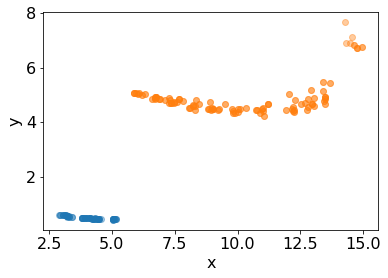

In [524]:
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# restrict to only the star settings
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0
boolr&=df['D']>0

#TODO: plot powerlaw relations between kappa^mup*r and a
alpha=0.4#0.01#
mu=2#2#1#0.5
c=1#/np.pi
df['x']=np.pi*df['r']**mu*df['kappa']/2
df['y']=df['varkappa']/(1+c*(df['varkappa']/df['x'])**-1)
# df['y']=(df['varkappa']/df['x'])**1

ax=plt.gca()
x_values=df.loc[boofk,'x'].values
y_values=df.loc[boofk,'y'].values
mx=np.max(y_values)
ax.scatter(x_values,y_values,c='C0',alpha=alpha)
print('loglog fit for Fenton-Karma model')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)
print('linlin fit for Fenton-Karma model')
dict_out=compute_95CI_ols(x_values,y_values);print_dict(dict_out)

x_values=df.loc[boolr,'x'].values
y_values=df.loc[boolr,'y'].values
mx=np.max(y_values)
ax.scatter(x_values,y_values,c='C1',alpha=alpha)
print('\nloglog fit for Luo-Rudy model')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)
print('linlin fit for Luo-Rudy model')
dict_out=compute_95CI_ols(x_values,y_values);print_dict(dict_out)

FormatAxes(
    ax,
    x1label='x',#'$r\kappa^p$',#'RMSE',
    x2label=f'y',
#         x2lim=None,use_loglog=True
)
# ax.set_xscale('log')
# ax.set_title(f'p = {mup}  color increases with D\n',fontsize=16)
plt.show()

loglog fit for Fenton-Karma model
m=0.3352824406924636
Delta_m=0.0062426144686236725
b=-0.310570857123855
Delta_b=0.008949413515814677
Rsquared=0.8756969393098766
linlin fit for Fenton-Karma model
m=0.09492067946398122
Delta_m=0.00186692114956038
b=0.7843441138036993
Delta_b=0.00795236312746675
Rsquared=0.863261930617747


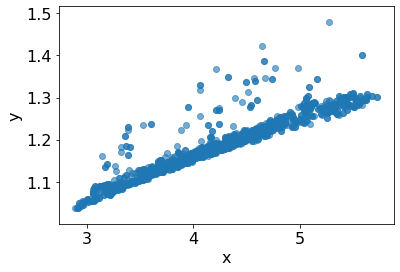

In [531]:
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# # restrict to only the star settings
# boofk&=bookeep
# boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0
boolr&=df['D']>0

#TODO: plot powerlaw relations between kappa^mup*r and a
alpha=0.6#0.01#
mu=1#2#1#0.5
c=1#/np.pi
# df['x']=df['r']**3*df['kappa']**2
# df['x']=df['r']**0.5*df['kappa']**0.5
df['x']=np.pi*df['r']**2*df['kappa']**1/2
# df['x']=np.pi*df['r']**3*df['kappa']**2
df['y']=1/(df['varkappa']*(df['x'])**-1)
df['y']=df['varkappa']/(1+c*(df['varkappa']/df['x'])**1)
# df['y']=df['varkappa']

ax=plt.gca()
x_values=df.loc[boofk,'x'].values
y_values=df.loc[boofk,'y'].values
mx=np.max(y_values)
ax.scatter(x_values,y_values,c='C0',alpha=alpha)
print('loglog fit for Fenton-Karma model')
dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)
print('linlin fit for Fenton-Karma model')
dict_out=compute_95CI_ols(x_values,y_values);print_dict(dict_out)

# x_values=df.loc[boolr,'x'].values
# y_values=df.loc[boolr,'y'].values
# mx=np.max(y_values)
# ax.scatter(x_values,y_values,c='C1',alpha=alpha)
# print('\nloglog fit for Luo-Rudy model')
# dict_out=compute_95CI_ols(np.log(x_values),np.log(y_values));print_dict(dict_out)
# print('linlin fit for Luo-Rudy model')
# dict_out=compute_95CI_ols(x_values,y_values);print_dict(dict_out)

FormatAxes(
    ax,
    x1label='x',#'$r\kappa^p$',#'RMSE',
    x2label=f'y',
#         x2lim=None,use_loglog=True
)
# ax.set_xscale('log')
# ax.set_title(f'p = {mup}  color increases with D\n',fontsize=16)
plt.show()

In [397]:
# is there a constant c s.t. these lines line up?

# other plots

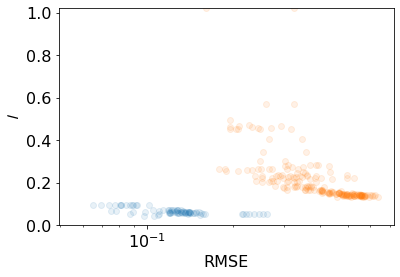

In [102]:
#plot l
fig,ax=plt.subplots()

x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'l'].values
ax.scatter(x_values,y_values,c='C0',alpha=0.1)

x_values=df.loc[boolr,'rmse_full'].values
y_values=df.loc[boolr,'l'].values
ax.scatter(x_values,y_values,c='C1',alpha=0.1)

FormatAxes(
    ax,
    x1label='RMSE',
    x2label=r'$\mathcal{l}$',
    x2lim=[0,np.max(y_values)]
)
ax.set_xscale('log')
# plt.show()

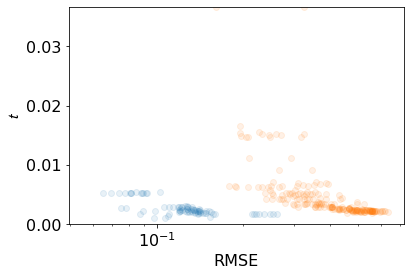

In [103]:
#plot lt
fig,ax=plt.subplots()
x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'lt'].values
ax.scatter(x_values,y_values,c='C0',alpha=0.1)

x_values=df.loc[boolr,'rmse_full'].values
y_values=df.loc[boolr,'lt'].values
ax.scatter(x_values,y_values,c='C1',alpha=0.1)

FormatAxes(
    ax,
    x1label='RMSE',
    x2label=r'$\mathcal{t}$',
    x2lim=[0,np.max(y_values)]
)
ax.set_xscale('log')
# plt.show()

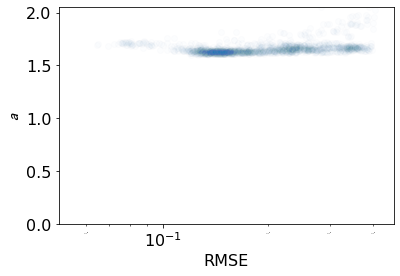

In [104]:
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# #restrict to only the star events
# boofk&=bookeep
# boolr&=bookeep

#plot a
x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'varkappa'].values

fig,ax=plt.subplots()
ax.scatter(x_values,y_values,c='C0',alpha=0.01)
FormatAxes(
    ax,
    x1label='RMSE',
    x2label=r'$\mathcal{a}$',
    x2lim=[0,np.max(y_values)]
)
ax.set_xscale('log')
# plt.show()

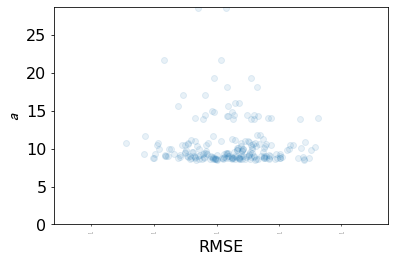

In [105]:
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
# #restrict to only the star events
boofk&=bookeep
boolr&=bookeep


#TODO: plot a versus the exponent, m
#TODO: put a slider into K(mu) to get a visually ideal mu 
x_values=df.loc[boolr,'m'].values
y_values=df.loc[boolr,'varkappa'].values
# x_values=df.loc[boofk,'m'].values
# y_values=df.loc[boofk,'varkappa'].values
fig,ax=plt.subplots()
ax.scatter(x_values,y_values,c='C0',alpha=0.1)
FormatAxes(
    ax,
    x1label='RMSE',
    x2label=r'$\mathcal{a}$',
    x2lim=[0,np.max(y_values)+0.1]
)
ax.set_xscale('log')
# plt.show()

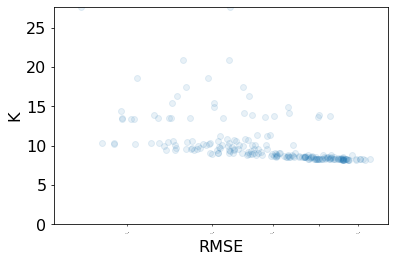

In [106]:
#heretim
#plot K given mup
mup=-.01
df['K']=df['varkappa']*(df['kappa']*df['r'])**mup
x_values=df.loc[boolr,'rmse_full'].values
y_values=df.loc[boolr,'K'].values
# x_values=df.loc[boofk,'rmse_full'].values
# y_values=df.loc[boofk,'K'].values
mx=np.max(y_values)
fig,ax=plt.subplots()
ax.scatter(x_values,y_values,c='C0',alpha=0.1)
FormatAxes(
    ax,
    x1label='RMSE',
    x2label='K',
    x2lim=[0,mx]
)
ax.set_xscale('log')
# plt.show()

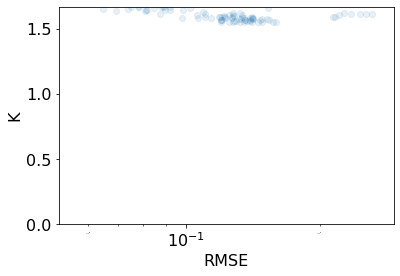

In [107]:
#heretim
#plot K given mup
mup=-.01
df['K']=df['varkappa']*(df['kappa']*df['r'])**mup
x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'K'].values
mx=np.max(y_values)
fig,ax=plt.subplots()
ax.scatter(x_values,y_values,c='C0',alpha=0.1)
FormatAxes(
    ax,
    x1label='RMSE',
    x2label='K',
    x2lim=[0,mx]
)
ax.set_xscale('log')
# plt.show()

True

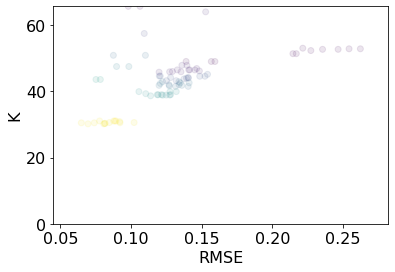

In [108]:
#DONE: plot K given mup
mup=1
df['K']=df['varkappa']*(df['kappa']*df['r'])**mup
x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'K'].values
c_values=df.loc[boofk,'r'].values
fig,ax=plt.subplots()
ax.scatter(x_values,y_values,c=c_values,alpha=0.1)
FormatAxes(
    ax,
    x1label='RMSE',
    x2label='K',
    x2lim=[0,np.max(y_values)]
)
# plt.show()

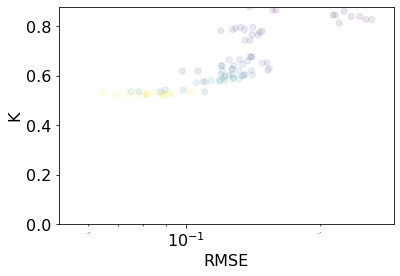

In [109]:
#TODO: plot the spacetime-scale invariant measure of a, r, and kappa
#DONE: plot K given mup
mup=-1
df['K']=df['varkappa']*(df['kappa']*df['r']**2)**mup
x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'K'].values
c_values=df.loc[boofk,'r'].values
fig,ax=plt.subplots()
ax.scatter(x_values,y_values,c=c_values,alpha=0.1)
FormatAxes(
    ax,
    x1label='RMSE',
    x2label='K',
    x2lim=[0,np.max(y_values)]
)
ax.set_xscale('log')
# plt.show()

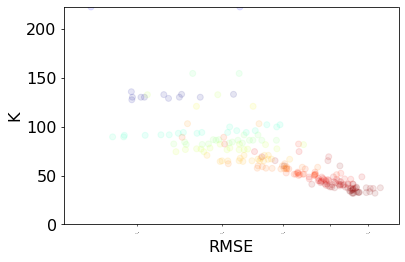

In [110]:
#TODO: plot the spacetime-scale invariant measure of a, r, and kappa
#DONE: plot K given mup
mup=1
df['K']=df['varkappa']*(df['kappa']*df['r']**2)**mup
x_values=df.loc[boolr,'rmse_full'].values
y_values=df.loc[boolr,'K'].values
c_values=df.loc[boolr,'r'].values
fig,ax=plt.subplots()
ax.scatter(x_values,y_values,c=-c_values,alpha=0.1,cmap='jet')
FormatAxes(
    ax,
    x1label='RMSE',
    x2label='K',
    x2lim=[0,np.max(y_values)]
)
ax.set_xscale('log')
# plt.show()

# for which of these values can it be argued that IF RMSE is the smallest, THEN the y-axis takes a constant value?
- at first glance, the scale-invariant measure $K=a/(\kappa r^2)$ jumps out.  Fantastic value of $K_s$
- at second glance, the inverse is not true.  the constant value does not imply minimal rmse

In [ ]:
#TODO: verify by repeating the plot for LR model
#TODO: make visually apparent to the reader by limiting max RMSE plotted
#TODO: plot K=a/(\kappa r^2) for FK and LR models
#TODO: plot what the large RMSE trials look like when K takes the special value, $_special K$

__Result__
- the best trials possess the value $K=K_s$. However, there exist trials that also possess the value $K=K_s$ that are by far not the best value.  <br>TODO: Plot them.

# investigating the parameter settings of the smallest RMSE trials

<IPython.core.display.Javascript object>


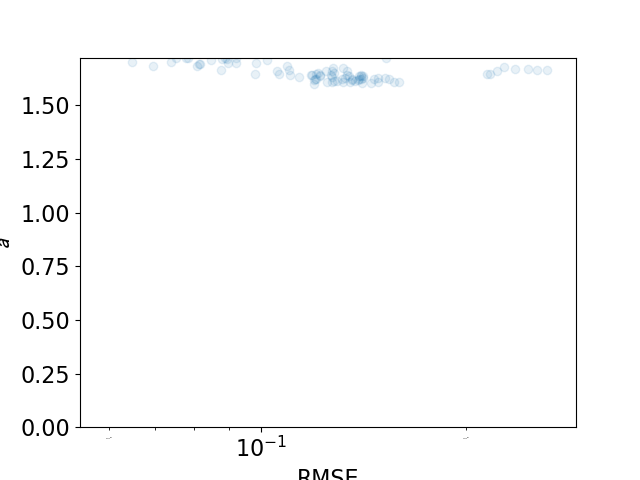

In [82]:
#plot a
x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'varkappa'].values

fig,ax=plt.subplots()
retval =ax.scatter(x_values,y_values,c='C0',alpha=0.1)
FormatAxes(
    ax,
    x1label='RMSE',
    x2label=r'$\mathcal{a}$',
    x2lim=[0,np.max(y_values)]
)
ax.set_xscale('log')
# plt.show()

<IPython.core.display.Javascript object>


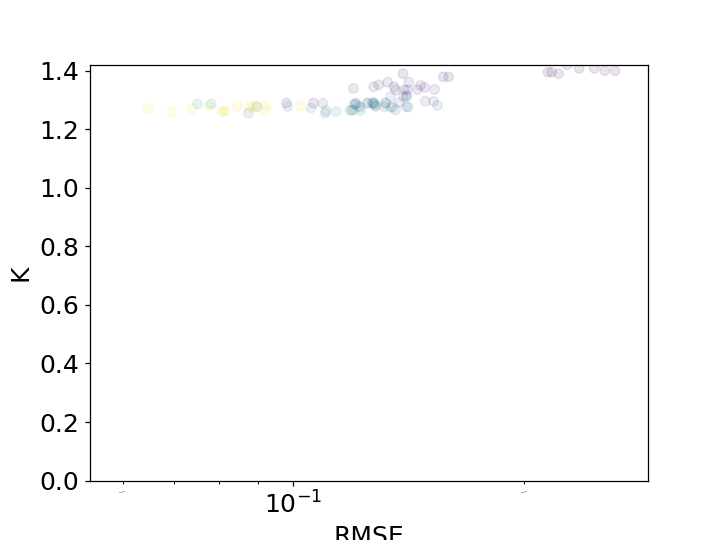

AttributeError: 'float' object has no attribute 'items'

In [72]:
#TODO: plot the spacetime-scale invariant measure of a, r, and kappa
import ipywidgets as widgets
from IPython.display import display

mup = widgets.IntSlider(value=5, min=0, max=10)

# def f1(a):
#     display(a)

# def f2(a):
#     display(a * 2)

# out1 = widgets.interactive_output(f1, {'a': a})
# out2 = widgets.interactive_output(f2, {'a': a})

# display(a)
# display(out1)
# display(out2)


#DONE: plot K given mup
mup=-0.25
df['K']=df['varkappa']*(df['kappa']*df['r']**2)**mup
x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'K'].values
c_values=df.loc[boofk,'r'].values
fig,ax=plt.subplots()
ax.scatter(x_values,y_values,c=c_values,alpha=0.1)
FormatAxes(
    ax,
    x1label='RMSE',
    x2label='K',
    x2lim=[0,np.max(y_values)]
)
ax.set_xscale('log')
retval=widgets.interactive_output(fig,mup)
# plt.show()
# display(ax)
display(retval)
# plt.show()

# make a slider for a multiplicative combination of parameters from star settings

In [77]:
#TODO: make mup replace amplitude slider
#TODO: make the ratio of the exponents between kappa and r replace the frequency slider

<IPython.core.display.Javascript object>


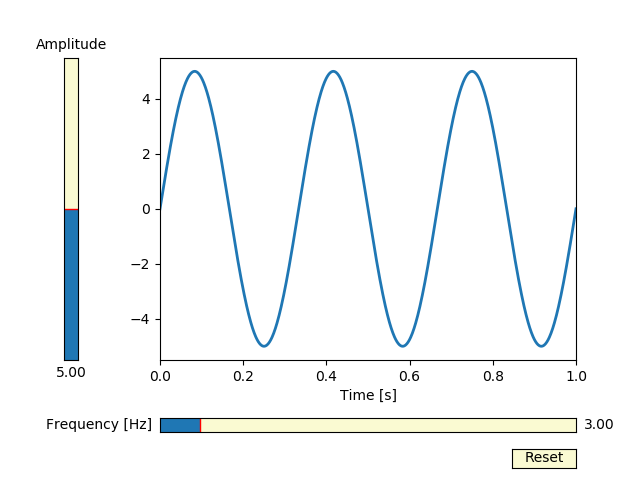

In [76]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
# line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

axcolor = 'lightgoldenrodyellow'
ax.margins(x=0)

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63], facecolor=axcolor)
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

In [87]:
!pip install plotly
# retval.set_paths?
import plotly

     |████████████████████████████████| 23.9 MB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/timothytyree/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [88]:
plotly

<module 'plotly' from '/home/timothytyree/anaconda3/lib/python3.7/site-packages/plotly/__init__.py'>

In [75]:
import ipywidgets as widgets
from IPython.display import display

a = widgets.IntSlider(value=5, min=0, max=10)

def f1(a):
    display(a)

def f2(a):
    display(a * 2)

out1 = widgets.interactive_output(f1, {'a': a})
out2 = widgets.interactive_output(f2, {'a': a})

display(a)
display(out1)
display(out2)

IntSlider(value=5, max=10)

Output()

Output()

# TODO: plot a vs. r for the star settings

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

columns=['varkappa','r','kappa', 'D','rmse_full']
data = np.cumsum(np.random.rand(10,3),axis=1)
# df = pd.DataFrame(data,columns=columns)

def g(x,y):
    plt.scatter(df[x], df[y])
    plt.show()

interactive_plot = interactive(g, x=columns, y=columns)
interactive_plot

interactive(children=(Dropdown(description='x', options=('varkappa', 'r', 'kappa', 'D', 'rmse_full'), value='v…

# looking for exponents on log-log plots

In [195]:
#define constant parameters
reflect=0
force_code=2
set_second=0
neighbor=0
no_attraction=0
no_repulsion=0
# kappa=100
L=10

#template query for the DataFrame
query =(df.set_second==set_second)
query&=(df.no_repulsion==no_repulsion)&(df.no_attraction==no_attraction)
query&=(df.neighbor==neighbor)&(df.force_code==force_code)
# query&=df.r==r
# query&=df.kappa==kappa
# query&=df.D==D
query&=df.L==L
query_template=query.copy()


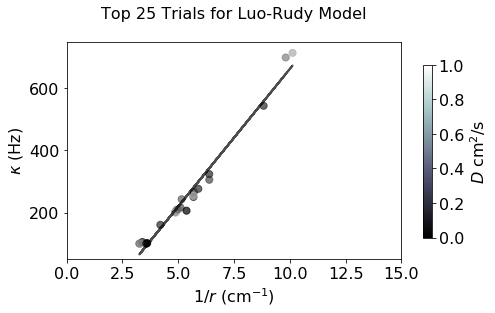

In [196]:
#select only the desired trials for the FK model
reflect=0
model_name_full='fk_pbc'#'lr_pbc'
model_name_full='lr_pbc'

num_points=25
fontsize=16#select only the desired trials for the FK model
reflect=0
model_name_full='fk_pbc'#'lr_pbc'
model_name_full='lr_pbc'

num_points=25
c_col='D'
clabel=r'$D$ cm$^2$/s'
vmin=0.;vmax=1
fontsize=16
x1lim=[0,15]
x2lim=[50,750]
# x1lim=[5,10]
# x2lim=[50,350]

input_cols=['r','D','varkappa','x0', 'L', 'force_code', 'neighbor', 'reflect', 'set_second',
       'no_repulsion', 'no_attraction']
sortby_col='rmse_full'

query=query_template.copy()
query&=(df.reflect==reflect)
query&=(df.model_name_full==model_name_full)
# query&=df.varkappa==varkappa
# query&=df.x0==x0

if model_name_full=='fk_pbc':
    modelname='Fenton-Karma'
elif model_name_full=='lr_pbc':
    modelname='Luo-Rudy'
else:
    raise(f'Not Yet Implemented! {model_name_full}')
dg=df[query].sort_values(by=sortby_col).copy()

#extract the data
r_values=dg.head(num_points)['r'].values
kappa_values=dg.head(num_points)['kappa'].values
c_values=dg.head(num_points)[c_col].values
x_values=1/r_values
y_values=kappa_values
#perform OLS on x,y
dict_out=compute_95CI_ols(x_values,y_values)
yhat_values=dict_out['m']*x_values+dict_out['b']

#scatter plot the first 100 r,kappa values, coloring by rmse
#TODO: repeat coloring by D
#TODO: repeat coloring by varkappa
fig,ax=plt.subplots()
ax.plot(x_values,yhat_values,c='k',alpha=.7,lw=2)
ax.scatter(x_values,y_values,c=c_values,cmap='gray',alpha=0.7,s=50,vmin=vmin,vmax=vmax)
title=f'Top {num_points} Trials for {modelname} Model\n'
FormatAxes(ax, x1lim=x1lim, x2lim=x2lim, x1label=r'$1/r$ (cm$^{-1}$)', x2label=r'$\kappa$ (Hz)', title=title, fontsize=fontsize, use_loglog=False)

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
cmap = plt.cm.bone
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
cb.set_label(clabel,fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

# cbar.ax.tick_params(labelsize=fontsize)
# cbar.set_label(output_col, fontsize=fontsize)

plt.show()
# print_dict()

In [645]:
x_values=1/r_values
y_values=kappa_values
#perform OLS on x,y
dict_out=compute_95CI_ols(x_values,y_values)
yhat_values=dict_out['m']*x_values+dict_out['b']
print(dict_out)

{'m': 88.56572472116645, 'Delta_m': 5.523301857214126, 'b': -223.64555854032227, 'Delta_b': 31.104443025988168, 'Rsquared': 0.9772445644348985}


# fix three parameters, plot powerlaw fit versus one parameter using the linear interpolant
Then, vary one of the fixed parameters
visualizing kappa versus r for various a, fixed, for either full model

In [647]:
df.head()

,m,Delta_m,M,Delta_M,Rsq,rmse,rmse_full,model_name_full,q_min,q_max,...,set_second,no_repulsion,no_attraction,l,lt,K,rkp,x,y,J
0,1.634225,0.011923,17.072853,0.539172,0.998796,0.213009,0.349726,lr_pbc,0.1,1.0,...,0,0,0,0.237505,0.005220,72.883852,7.277642,13.308193,5.963486,72.883852
1,1.909927,0.025313,5.893359,0.282508,0.996038,0.184324,0.286524,fk_pbc,0.1,1.0,...,0,0,0,0.045810,0.001287,9.723701,4.328753,3.580614,1.120132,9.723701
2,1.653182,0.024584,17.213944,1.098278,0.995017,0.522481,0.679965,lr_pbc,0.1,1.0,...,0,0,0,0.137901,0.002178,69.490667,6.702291,7.468217,4.025520,69.490667
3,1.689880,0.015893,9.883946,0.345165,0.998001,0.165833,1.628595,fk_ncbc,0.1,1.0,...,0,0,0,0.170654,0.005840,26.960418,5.243037,7.746920,3.034009,26.960418
4,1.706467,0.023508,12.187740,0.659933,0.995721,0.336254,2.128713,lr_ncbc,0.1,1.0,...,0,0,0,0.125682,0.002822,37.363440,6.025871,7.716103,3.244386,37.363440


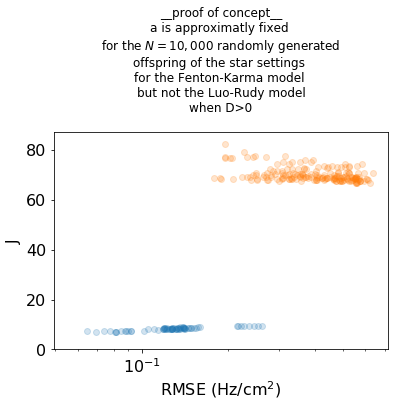

In [649]:
#plot a
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
#restrict to only the star events
boofk&=bookeep
boolr&=bookeep
#restrict to only the settings with positive D
boofk&=df['D']>0#==0#
boolr&=df['D']>0#==0#

#plot a
fig,ax=plt.subplots()
x_values=df.loc[boofk,'rmse_full'].values
y_values=df.loc[boofk,'J'].values
ax.scatter(x_values,y_values,c='C0',alpha=0.2)
x_values=df.loc[boolr,'rmse_full'].values
y_values=df.loc[boolr,'J'].values
ax.scatter(x_values,y_values,c='C1',alpha=0.2)
FormatAxes(
    ax,
    x1label=r'RMSE (Hz/cm$^2$)',
    x2label=r'J',
    x2lim=[0,np.max(y_values)+5]
)
ax.set_xscale('log')
ax.set_title(r'''__proof of concept__
a is approximatly fixed 
for the $N=10,000$ randomly generated 
offspring of the star settings 
for the Fenton-Karma model 
but not the Luo-Rudy model
when D>0
''')
plt.show()